In [29]:
import torch
import pickle

from pathlib import Path
from itertools import combinations
from matplotlib.colors import LogNorm

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import nglview as nv

blue = (70 / 255, 110 / 255, 250 / 255)


# Visualization

In [46]:
molecule = "1fme"

gro_path = f"./{molecule.upper()}/folded.gro"
traj = md.load(gro_path)
print(traj)
traj.center_coordinates()
view = nv.show_mdtraj(traj)
view.add_representation("licorice", selection="protein")

ca_atoms = [atom for atom in traj.topology.atoms if atom.name == "CA"]
ca_indices = [atom.index + 1 for atom in ca_atoms]
print("Alpha carbon indices:", ca_indices)

view

<mdtraj.Trajectory with 1 frames, 504 atoms, 28 residues, and unitcells>
Alpha carbon indices: [5, 20, 37, 58, 72, 82, 104, 125, 147, 154, 178, 192, 212, 236, 250, 265, 287, 302, 321, 345, 357, 377, 396, 411, 433, 453, 475, 482]


NGLWidget()

In [30]:
cnt = 0
for i in range(len(ca_indices)):
    for j in range(i+1, len(ca_indices)):
        print(f"d{cnt+1}: DISTANCE ATOMS={ca_indices[i]},{ca_indices[j]}")
        cnt += 1

d1: DISTANCE ATOMS=5,20
d2: DISTANCE ATOMS=5,37
d3: DISTANCE ATOMS=5,58
d4: DISTANCE ATOMS=5,72
d5: DISTANCE ATOMS=5,82
d6: DISTANCE ATOMS=5,104
d7: DISTANCE ATOMS=5,125
d8: DISTANCE ATOMS=5,147
d9: DISTANCE ATOMS=5,154
d10: DISTANCE ATOMS=5,178
d11: DISTANCE ATOMS=5,192
d12: DISTANCE ATOMS=5,212
d13: DISTANCE ATOMS=5,236
d14: DISTANCE ATOMS=5,250
d15: DISTANCE ATOMS=5,265
d16: DISTANCE ATOMS=5,287
d17: DISTANCE ATOMS=5,302
d18: DISTANCE ATOMS=5,321
d19: DISTANCE ATOMS=5,345
d20: DISTANCE ATOMS=5,357
d21: DISTANCE ATOMS=5,377
d22: DISTANCE ATOMS=5,396
d23: DISTANCE ATOMS=5,411
d24: DISTANCE ATOMS=5,433
d25: DISTANCE ATOMS=5,453
d26: DISTANCE ATOMS=5,475
d27: DISTANCE ATOMS=5,482
d28: DISTANCE ATOMS=20,37
d29: DISTANCE ATOMS=20,58
d30: DISTANCE ATOMS=20,72
d31: DISTANCE ATOMS=20,82
d32: DISTANCE ATOMS=20,104
d33: DISTANCE ATOMS=20,125
d34: DISTANCE ATOMS=20,147
d35: DISTANCE ATOMS=20,154
d36: DISTANCE ATOMS=20,178
d37: DISTANCE ATOMS=20,192
d38: DISTANCE ATOMS=20,212
d39: DISTANCE ATOMS

In [31]:
print("ARG=" + ",".join(f"d{i+1}" for i in range(cnt)))

ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,d150,d151,d152,d153,d154,d155,d156,d157,d158,d159,d160,d161,d162,d163,d164,d165,d166,d167,d168,d169,d170,d171,d172,d173,d174,d175,d176,d177,d178,d179,d180,d181,d182,d183,d184,d185,d186,d187,d188,d189,d190,d191,d192,d193,d194,d195,d196,d197,d198,d199,d200,d201,d202,d203,d204,d205,d206,d207,d208,d209,d210,d211,d212,d213,d214,d215,d216,d217,d218,d219,d220,d221

# Descriptors

In [ ]:
sample_traj_path = "/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_1FME-0-protein/1FME-0-protein/1FME-0-protein-000-aligned.dcd"
pdb_path = "/home/shpark/prj-mlcv/lib/bioemu/opes/data/1FME/1FME_from_mae.pdb"
# pdb_path = "/home/shpark/prj-mlcv/lib/DESRES/data/1FME/1FME.pdb"

sample_traj = md.load_dcd(
    sample_traj_path,
    top=pdb_path
)
sample_traj.center_coordinates()
print(sample_traj)

sample_view = nv.show_mdtraj(sample_traj)
sample_view.add_representation("licorice", selection="protein")
sample_view.display()

<mdtraj.Trajectory with 10000 frames, 504 atoms, 28 residues, and unitcells>


NGLWidget(max_frame=9999)

In [8]:
pdb_traj = md.load_pdb(pdb_path)
pdb_traj.center_coordinates()
pdb_view = nv.show_mdtraj(pdb_traj)
pdb_view.add_representation("licorice", selection="protein")
pdb_view.display()


NGLWidget()

In [ ]:
ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)

# TICA

[[ 4.388427  -8.241566 ]
 [ 4.446449  -8.322918 ]
 [ 4.5427732 -8.10586  ]
 [ 4.36776   -7.9801545]
 [ 4.3411207 -8.103855 ]
 [ 4.3444242 -8.148921 ]
 [ 4.159697  -8.294862 ]
 [ 4.2598996 -8.438976 ]
 [ 4.2863455 -8.50431  ]
 [ 4.255232  -8.542316 ]
 [ 4.289735  -8.5141535]
 [ 4.273755  -8.462681 ]
 [ 4.2560253 -8.525238 ]
 [ 4.3401127 -8.527176 ]
 [ 4.424382  -8.80921  ]
 [ 4.3496046 -8.928103 ]
 [ 4.3253775 -9.007136 ]
 [ 4.385047  -9.091181 ]
 [ 4.339431  -8.92671  ]
 [ 4.2860317 -8.676922 ]
 [ 4.2491775 -8.7926655]
 [ 4.2171035 -8.6469755]
 [ 4.3048    -8.612998 ]
 [ 4.290312  -8.666277 ]
 [ 4.187369  -8.719632 ]
 [ 4.2223434 -8.754861 ]
 [ 4.2709107 -8.755661 ]
 [ 4.2619557 -8.71273  ]
 [ 4.2898974 -8.829094 ]
 [ 4.316687  -8.734823 ]
 [ 4.2326646 -8.686372 ]
 [ 4.267492  -8.462317 ]
 [ 4.3458405 -8.40557  ]
 [ 4.315588  -8.642131 ]
 [ 4.386721  -8.715311 ]
 [ 4.337493  -8.581955 ]
 [ 4.3909745 -8.780307 ]
 [ 4.371835  -8.750496 ]
 [ 4.300525  -8.791249 ]
 [ 4.2339053 -8.924966 ]


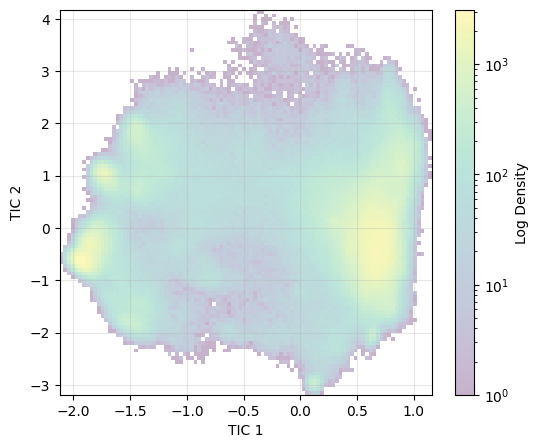

In [64]:
molecule = "1fme"
tica_model_path = f"./{molecule.upper()}/{molecule.upper()}_tica_model_lag10.pkl"
with open(tica_model_path, 'rb') as f:
	tica_model = pickle.load(f)

tica_coord_path = f"./{molecule.upper()}/{molecule.upper()}_tica_coord_lag10.npy"
tica_coord_full = np.load(tica_coord_path)

seed = 0
# analysis_dir = Path(f"/home/shpark/prj-mlcv/lib/bioemu/opes/simulations/1fme/tica/debug/analysis")
# traj_file = analysis_dir / f"{seed}_tc.xtc"
# traj_file = Path(f"/home/shpark/prj-mlcv/lib/bioemu/opes/simulations/1fme/tica/debug/{seed}.xtc")
traj_file = Path(f"/home/shpark/prj-mlcv/lib/bioemu/opes/simulations/1fme/tica/debug/analysis/0_tc_debug.xtc")


top_file = f"./{molecule.upper()}/folded.gro"
traj = md.load(str(traj_file), top=top_file)
ca_resid_pair = np.array([(a.index, b.index) for a, b in combinations(list(traj.topology.residues), 2)])
ca_pair_contacts, _ = md.compute_contacts(traj, scheme="ca", contacts=ca_resid_pair, periodic=False)
tica_coord = tica_model.transform(ca_pair_contacts)
print(tica_coord)

# Create plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
h = ax.hist2d(
	tica_coord_full[:, 0], tica_coord_full[:, 1], 
	bins=100, norm=LogNorm(), alpha=0.3
)
plt.colorbar(h[3], ax=ax, label='Log Density')
ax.scatter(
	tica_coord[:, 0], tica_coord[:, 1], 
	color=blue, s=2, alpha=0.5,
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.grid(True, alpha=0.3)
plt.show()

In [45]:
traj = traj.center_coordinates()
debug_view = nv.show_mdtraj(traj)
debug_view.add_representation("licorice", selection="protein")
debug_view.display()

NGLWidget(max_frame=100)

In [67]:
xtc_path = "/bioemu/opes/simulations/1fme/tica/debug/0.xtc"
analysis_dir = Path(f"/bioemu/opes/simulations/1fme/tica/debug/")
tpr_path = "/bioemu/opes/data/1FME/nvt_0.tpr"
# cmd = f"gmx trjconv -f {xtc_path} -o {analysis_dir}/0_debug.xtc -pbc nojump "
cmd = f"gmx trjconv -f {xtc_path}-s {tpr_path} -pbc nojump -o {analysis_dir}/0.xtc"
print(cmd)

gmx trjconv -f /bioemu/opes/simulations/1fme/tica/debug/0.xtc-s /bioemu/opes/data/1FME/nvt_0.tpr -pbc nojump -o /bioemu/opes/simulations/1fme/tica/debug/0.xtc
